<style>
@keyframes gradientMove {
  0% { background-position: 0% 50%; }
  50% { background-position: 100% 50%; }
  100% { background-position: 0% 50%; }
}
.gradient-bg {
  border-radius: 10px;
  background: linear-gradient(-45deg, #ee7752, #e73c7e, #23a6d5, #23d5ab);
  background-size: 300% 300%;
  animation: gradientMove 8s ease infinite;
  font-size: 130%;
  text-align: left;
}
</style>

<div class="gradient-bg">
  <br/>
  <center><h1><font color='white'>Emrecan Üncü - CRM SALES PROJECT</font></h1></center>
  <br/>
</div>


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('default')
sns.set_palette("husl")

In [2]:
DATA_PATH = r"C:\Users\NITRO\Desktop\CRM_Data_Analysis_for_Sales\Data\orginal data"

# =============================================================================
# 1. VERİ YÜKLEME VE İLK İNCELEME
# =============================================================================

In [ ]:

accounts_df = pd.read_csv(f"{DATA_PATH}/accounts.csv")
products_df = pd.read_csv(f"{DATA_PATH}/products.csv")
sales_pipeline_df = pd.read_csv(f"{DATA_PATH}/sales_pipeline.csv")
sales_team_df = pd.read_csv(f"{DATA_PATH}/sales_teams.csv")




for df in [accounts_df,sales_team_df, products_df,sales_pipeline_df]:
    display(df.info())
    display(df.describe(include='all'))



In [5]:
print(f"\n1. ACCOUNTS Tablosu: {accounts_df.shape[0]} satır, {accounts_df.shape[1]} sütun")
print(f"2. SALES_PIPELINE Tablosu: {sales_pipeline_df.shape[0]} satır, {sales_pipeline_df.shape[1]} sütun")
print(f"3. SALES_TEAMS Tablosu: {sales_team_df.shape[0]} satır, {sales_team_df.shape[1]} sütun")
print(f"4. PRODUCTS Tablosu: {products_df.shape[0]} satır, {products_df.shape[1]} sütun")


1. ACCOUNTS Tablosu: 85 satır, 7 sütun
2. SALES_PIPELINE Tablosu: 8800 satır, 8 sütun
3. SALES_TEAMS Tablosu: 35 satır, 3 sütun
4. PRODUCTS Tablosu: 7 satır, 3 sütun


# 📁 Veri Dosyaları ve Açıklamaları

---

## 🏢 accounts.csv — Şirket Bilgileri
💡 Bu dosya, satış fırsatlarına dahil olan şirketlerle ilgili bilgileri içerir.

- 🏷️ **account:** Şirket adı  
- 🏭 **sector:** Şirketin faaliyet gösterdiği endüstri sektörü  
- 📆 **year_established:** Şirketin kuruluş yılı  
- 💰 **revenue:** Şirketin yıllık geliri (milyon USD cinsinden)  
- 👥 **employees:** Çalışan sayısı  
- 📍 **office_location:** Şirket merkezinin konumu  
- 🧩 **subsidiary_of:** Şirketin bağlı olduğu ana şirket (varsa)  

---

## 👨‍💼 sales_teams.csv — Satış Ekibi Bilgileri
💡 Satış temsilcileri ve yöneticileri hakkındaki bilgileri içerir.

- 🧑‍💼 **sales_agent:** Satış temsilcisinin adı  
- 👔 **manager:** İlgili satış yöneticisinin adı  
- 🏢 **regional_office:** Bölgesel ofisin konumu  

---

## 💻 products.csv — Ürün Bilgileri
💡 Şirketin sunduğu bilgisayar donanımı ürünleriyle ilgili detaylar.

- 📦 **product:** Ürün adı  
- 🧬 **series:** Ürünün ait olduğu seri veya aile  
- 💵 **sales_price:** Tavsiye edilen satış fiyatı  

---

## 📊 sales_pipeline.csv — Satış Fırsatları Verisi
💡 Satış sürecindeki her bir fırsatın detaylarını içerir.

- 🆔 **opportunity_id:** Her satış fırsatı için benzersiz kimlik numarası  
- 🧑‍💼 **sales_agent:** Fırsattan sorumlu satış temsilcisi  
- 💻 **product:** Fırsatta yer alan ürün  
- 🏢 **account:** Fırsatla ilişkili şirket (varsa)  
- 🔄 **deal_stage:** Satış sürecinin aşaması (örnek: *Prospecting → Engaging → Won / Lost*)  
- 📅 **engage_date:** "Engaging" aşamasının başlatıldığı tarih (varsa)  
- ✅ **close_date:** Fırsatın "Kazandı (Won)" veya "Kaybetti (Lost)" olarak kapandığı tarih (varsa)  
- 💰 **close_value:** Fırsattan elde edilen gelir (varsa)  


# =============================================================================
# 2. ACCOUNTS TABLOSU ANALİZİ
# =============================================================================

In [16]:
print("\n--- Sütun İsimleri ve Veri Tipleri ---")
print(accounts_df.dtypes)


--- Sütun İsimleri ve Veri Tipleri ---
account              object
sector               object
year_established      int64
revenue             float64
employees             int64
office_location      object
subsidiary_of        object
dtype: object


In [6]:
df=accounts_df.copy()

In [7]:
df.head()


,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [8]:
df.tail()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
80,Zathunicon,retail,2010,71.12,144,United States,NaN
81,Zencorporation,technolgy,2011,40.79,142,China,NaN
82,Zoomit,entertainment,1992,324.19,978,United States,NaN
83,Zotware,software,1979,4478.47,13809,United States,NaN
84,Zumgoity,medical,1984,441.08,1210,United States,NaN


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [17]:
print("\n--- Temel İstatistikler ---")
print(accounts_df.describe(include='all'))


--- Temel İstatistikler ---
                 account  sector  year_established       revenue  \
count                 85      85         85.000000     85.000000   
unique                85      10               NaN           NaN   
top     Acme Corporation  retail               NaN           NaN   
freq                   1      17               NaN           NaN   
mean                 NaN     NaN       1996.105882   1994.632941   
std                  NaN     NaN          8.865427   2169.491436   
min                  NaN     NaN       1979.000000      4.540000   
25%                  NaN     NaN       1989.000000    497.110000   
50%                  NaN     NaN       1996.000000   1223.720000   
75%                  NaN     NaN       2002.000000   2741.370000   
max                  NaN     NaN       2017.000000  11698.030000   

           employees office_location     subsidiary_of  
count      85.000000              85                15  
unique           NaN              15    

In [18]:
print("\n--- Eksik Veri Analizi ---")
missing_accounts = pd.DataFrame({
    'Sütun': accounts_df.columns,
    'Eksik_Sayısı': accounts_df.isnull().sum(),
    'Eksik_Yüzde': (accounts_df.isnull().sum() / len(accounts_df) * 100).round(2)
})
print(missing_accounts[missing_accounts['Eksik_Sayısı'] > 0])


--- Eksik Veri Analizi ---
                       Sütun  Eksik_Sayısı  Eksik_Yüzde
subsidiary_of  subsidiary_of            70        82.35


In [19]:
print("\n--- Tekil Değer Sayıları ---")
print(accounts_df.nunique())


--- Tekil Değer Sayıları ---
account             85
sector              10
year_established    35
revenue             85
employees           85
office_location     15
subsidiary_of        7
dtype: int64


In [30]:
# Kategorik değişken dağılımları
print("\n--- Sector Dağılımı ---")
if 'sector' in accounts_df.columns:
    print(accounts_df['sector'].value_counts())


--- Sector Dağılımı ---
sector
retail                17
technolgy             12
medical               12
marketing              8
finance                8
software               7
entertainment          6
telecommunications     6
services               5
employment             4
Name: count, dtype: int64


In [31]:
print("\n--- Year Established Dağılımı ---")
if 'year_established' in accounts_df.columns:
    print(accounts_df['year_established'].describe())


--- Year Established Dağılımı ---
count      85.000000
mean     1996.105882
std         8.865427
min      1979.000000
25%      1989.000000
50%      1996.000000
75%      2002.000000
max      2017.000000
Name: year_established, dtype: float64


# =============================================================================
# 3. SALES_PIPELINE TABLOSU ANALİZİ
# =============================================================================

In [24]:
print("\n--- Sütun İsimleri ve Veri Tipleri ---")
print(sales_pipeline_df.dtypes)


--- Sütun İsimleri ve Veri Tipleri ---
opportunity_id     object
sales_agent        object
product            object
account            object
deal_stage         object
engage_date        object
close_date         object
close_value       float64
dtype: object


In [25]:
print("\n--- İlk 5 Kayıt ---")
print(sales_pipeline_df.head())


--- İlk 5 Kayıt ---
  opportunity_id      sales_agent         product  account deal_stage  \
0       1C1I7A6R      Moses Frase  GTX Plus Basic  Cancity        Won   
1       Z063OYW0  Darcel Schlecht          GTXPro    Isdom        Won   
2       EC4QE1BX  Darcel Schlecht      MG Special  Cancity        Won   
3       MV1LWRNH      Moses Frase       GTX Basic  Codehow        Won   
4       PE84CX4O        Zane Levy       GTX Basic   Hatfan        Won   

  engage_date  close_date  close_value  
0  2016-10-20  2017-03-01       1054.0  
1  2016-10-25  2017-03-11       4514.0  
2  2016-10-25  2017-03-07         50.0  
3  2016-10-25  2017-03-09        588.0  
4  2016-10-25  2017-03-02        517.0  


In [26]:
print("\n--- Temel İstatistikler ---")
print(sales_pipeline_df.describe(include='all'))


--- Temel İstatistikler ---
       opportunity_id      sales_agent    product   account deal_stage  \
count            8800             8800       8800      7375       8800   
unique           8800               30          7        85          4   
top          1C1I7A6R  Darcel Schlecht  GTX Basic  Hottechi        Won   
freq                1              747       1866       200       4238   
mean              NaN              NaN        NaN       NaN        NaN   
std               NaN              NaN        NaN       NaN        NaN   
min               NaN              NaN        NaN       NaN        NaN   
25%               NaN              NaN        NaN       NaN        NaN   
50%               NaN              NaN        NaN       NaN        NaN   
75%               NaN              NaN        NaN       NaN        NaN   
max               NaN              NaN        NaN       NaN        NaN   

       engage_date  close_date   close_value  
count         8300        6711   67

In [27]:
print("\n--- Eksik Veri Analizi ---")
missing_sales = pd.DataFrame({
    'Sütun': sales_pipeline_df.columns,
    'Eksik_Sayısı': sales_pipeline_df.isnull().sum(),
    'Eksik_Yüzde': (sales_pipeline_df.isnull().sum() / len(sales_pipeline_df) * 100).round(2)
})
print(missing_sales[missing_sales['Eksik_Sayısı'] > 0])


--- Eksik Veri Analizi ---
                   Sütun  Eksik_Sayısı  Eksik_Yüzde
account          account          1425        16.19
engage_date  engage_date           500         5.68
close_date    close_date          2089        23.74
close_value  close_value          2089        23.74


In [32]:
# Deal Stage analizi
print("\n--- Deal Stage Dağılımı ---")
if 'deal_stage' in sales_pipeline_df.columns:
    print(sales_pipeline_df['deal_stage'].value_counts())
    print(sales_pipeline_df['deal_stage'].unique())


--- Deal Stage Dağılımı ---
deal_stage
Won            4238
Lost           2473
Engaging       1589
Prospecting     500
Name: count, dtype: int64
['Won' 'Engaging' 'Lost' 'Prospecting']


In [33]:
print("\n--- Close Value İstatistikleri ---")
if 'close_value' in sales_pipeline_df.columns:
    print(sales_pipeline_df['close_value'].describe())
    print(f"Toplam Satış Değeri: ${sales_pipeline_df['close_value'].sum():,.2f}")



--- Close Value İstatistikleri ---
count     6711.000000
mean      1490.915512
std       2320.670773
min          0.000000
25%          0.000000
50%        472.000000
75%       3225.000000
max      30288.000000
Name: close_value, dtype: float64
Toplam Satış Değeri: $10,005,534.00


# =============================================================================
# 4. SALES_TEAMS TABLOSU ANALİZİ
# =============================================================================

In [34]:
print("\n--- Sütun İsimleri ve Veri Tipleri ---")
print(sales_team_df.dtypes)

print("\n--- İlk 5 Kayıt ---")
print(sales_team_df.head())

print("\n--- Eksik Veri Analizi ---")
missing_teams = pd.DataFrame({
    'Sütun': sales_team_df.columns,
    'Eksik_Sayısı': sales_team_df.isnull().sum(),
    'Eksik_Yüzde': (sales_team_df.isnull().sum() / len(sales_team_df) * 100).round(2)
})
print(missing_teams[missing_teams['Eksik_Sayısı'] > 0])

print("\n--- Manager Dağılımı ---")
if 'manager_text' in sales_team_df.columns:
    print(sales_team_df['manager_text'].value_counts())

print("\n--- Regional Office Dağılımı ---")
if 'regional_office_text' in sales_team_df.columns:
    print(sales_team_df['regional_office_text'].value_counts())



--- Sütun İsimleri ve Veri Tipleri ---
sales_agent        object
manager            object
regional_office    object
dtype: object

--- İlk 5 Kayıt ---
         sales_agent           manager regional_office
0      Anna Snelling  Dustin Brinkmann         Central
1     Cecily Lampkin  Dustin Brinkmann         Central
2  Versie Hillebrand  Dustin Brinkmann         Central
3    Lajuana Vencill  Dustin Brinkmann         Central
4        Moses Frase  Dustin Brinkmann         Central

--- Eksik Veri Analizi ---
Empty DataFrame
Columns: [Sütun, Eksik_Sayısı, Eksik_Yüzde]
Index: []

--- Manager Dağılımı ---

--- Regional Office Dağılımı ---


# =============================================================================
# 5. PRODUCTS TABLOSU ANALİZİ
# =============================================================================

In [35]:
print("\n--- Sütun İsimleri ve Veri Tipleri ---")
print(products_df.dtypes)

print("\n--- İlk 5 Kayıt ---")
print(products_df.head())

print("\n--- Temel İstatistikler ---")
print(products_df.describe(include='all'))

print("\n--- Eksik Veri Analizi ---")
missing_products = pd.DataFrame({
    'Sütun': products_df.columns,
    'Eksik_Sayısı': products_df.isnull().sum(),
    'Eksik_Yüzde': (products_df.isnull().sum() / len(products_df) * 100).round(2)
})
print(missing_products[missing_products['Eksik_Sayısı'] > 0])

print("\n--- Tekil Değer Sayıları ---")
print(products_df.nunique())

# Product dağılımı
print("\n--- Product Dağılımı ---")
if 'product_text' in products_df.columns:
    print(products_df['product_text'].value_counts())

# Series dağılımı
print("\n--- Series Dağılımı ---")
if 'series_text' in products_df.columns:
    print(products_df['series_text'].value_counts())

# Sales Price analizi
print("\n--- Sales Price İstatistikleri ---")
if 'sales_price_bigint' in products_df.columns:
    print(products_df['sales_price_bigint'].describe())
    print(f"Ortalama Ürün Fiyatı: ${products_df['sales_price_bigint'].mean():,.2f}")
    print(f"En Düşük Fiyat: ${products_df['sales_price_bigint'].min():,.2f}")
    print(f"En Yüksek Fiyat: ${products_df['sales_price_bigint'].max():,.2f}")



--- Sütun İsimleri ve Veri Tipleri ---
product        object
series         object
sales_price     int64
dtype: object

--- İlk 5 Kayıt ---
        product series  sales_price
0     GTX Basic    GTX          550
1       GTX Pro    GTX         4821
2    MG Special     MG           55
3   MG Advanced     MG         3393
4  GTX Plus Pro    GTX         5482

--- Temel İstatistikler ---
          product series   sales_price
count           7      7      7.000000
unique          7      3           NaN
top     GTX Basic    GTX           NaN
freq            1      4           NaN
mean          NaN    NaN   6023.571429
std           NaN    NaN   9388.428070
min           NaN    NaN     55.000000
25%           NaN    NaN    823.000000
50%           NaN    NaN   3393.000000
75%           NaN    NaN   5151.500000
max           NaN    NaN  26768.000000

--- Eksik Veri Analizi ---
Empty DataFrame
Columns: [Sütun, Eksik_Sayısı, Eksik_Yüzde]
Index: []

--- Tekil Değer Sayıları ---
product        7
s

# =============================================================================
# 6. GÖRSELLEŞTIRMELER - EDA
# =============================================================================

In [55]:
# 🔤 Türkçe karakter desteği
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.unicode_minus': False
})

# 🎨 Ortak stil ayarları
plt.style.use('seaborn-v0_8-whitegrid')

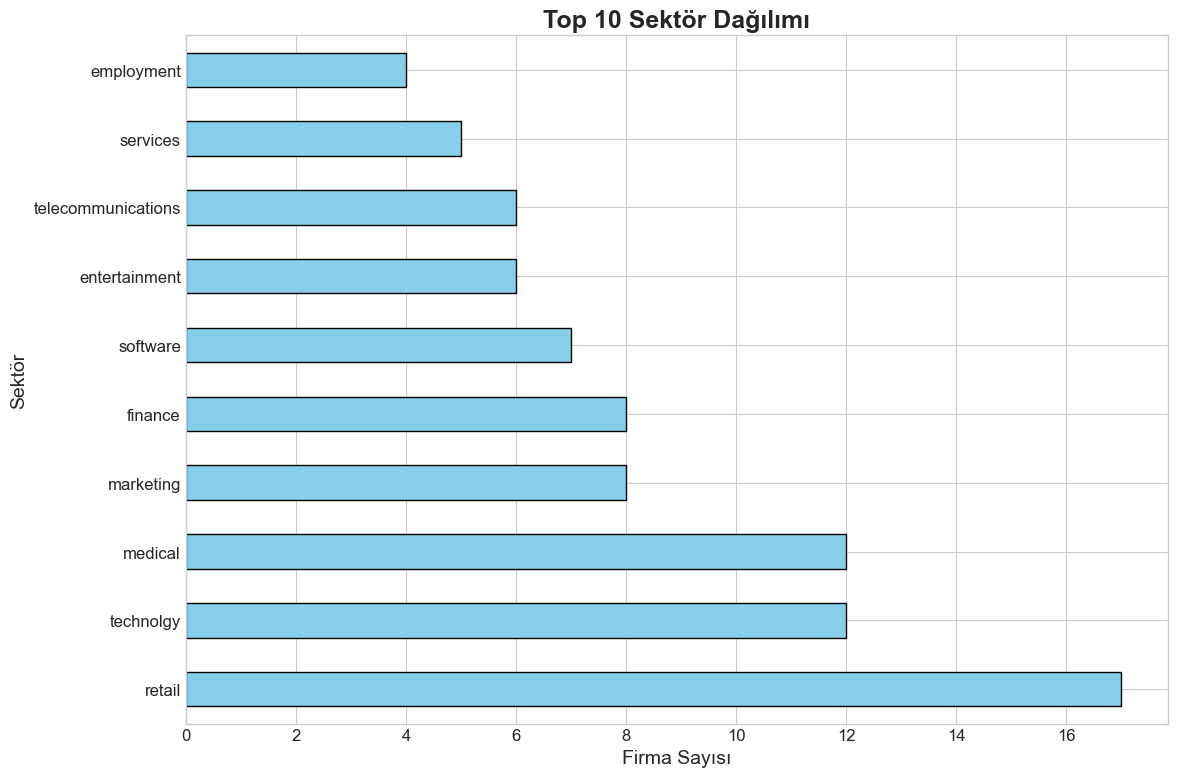

In [57]:
if 'sector' in accounts_df.columns:
    plt.figure(figsize=(12, 8))
    accounts_df['sector'].value_counts().head(10).plot(kind='barh', color='skyblue', edgecolor='black')
    plt.title('Top 10 Sektör Dağılımı', fontsize=18, fontweight='bold')
    plt.xlabel('Firma Sayısı', fontsize=14)
    plt.ylabel('Sektör', fontsize=14)
    plt.tight_layout()
    plt.savefig('grafik_01_sektor_dagilimi.png', dpi=400)
    plt.show()

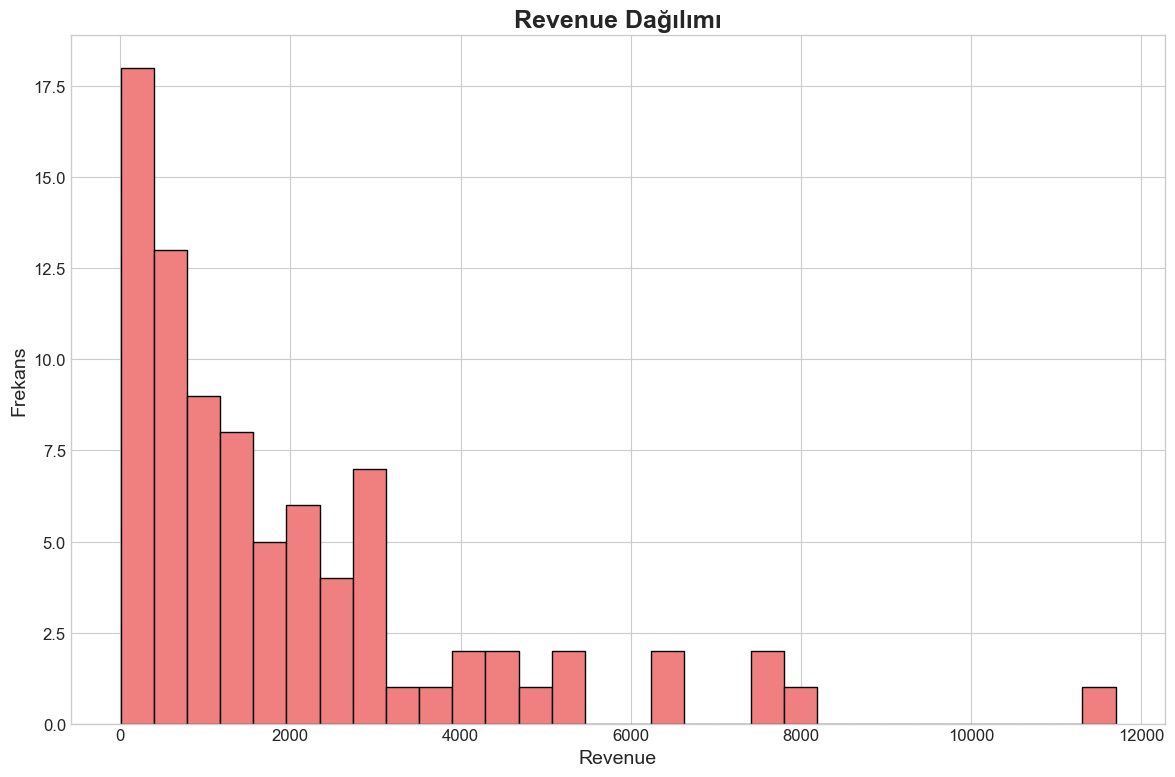

In [59]:
if 'revenue' in accounts_df.columns:
    plt.figure(figsize=(12, 8))
    accounts_df['revenue'].hist(bins=30, edgecolor='black', color='lightcoral')
    plt.title('Revenue Dağılımı', fontsize=18, fontweight='bold')
    plt.xlabel('Revenue', fontsize=14)
    plt.ylabel('Frekans', fontsize=14)
    plt.tight_layout()
    plt.savefig('grafik_02_revenue_dagilimi.png', dpi=400)
    plt.show()

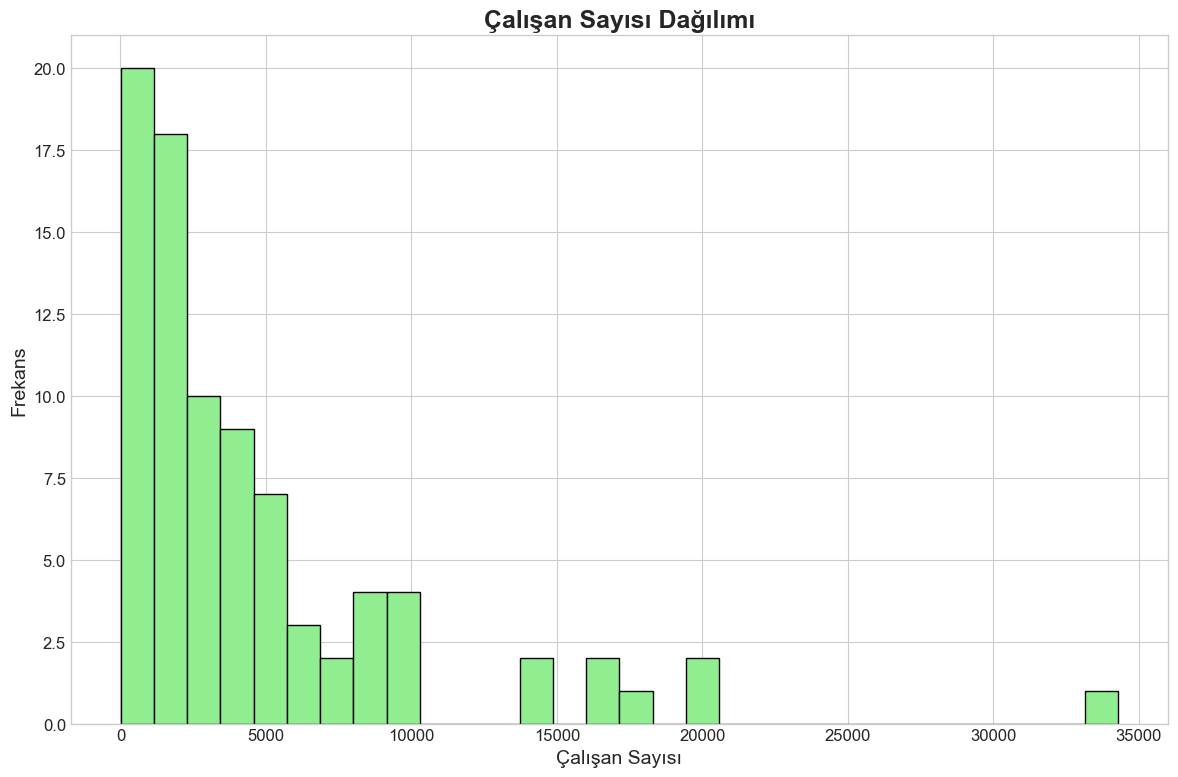

In [60]:
if 'employees' in accounts_df.columns:
    plt.figure(figsize=(12, 8))
    accounts_df['employees'].hist(bins=30, edgecolor='black', color='lightgreen')
    plt.title('Çalışan Sayısı Dağılımı', fontsize=18, fontweight='bold')
    plt.xlabel('Çalışan Sayısı', fontsize=14)
    plt.ylabel('Frekans', fontsize=14)
    plt.tight_layout()
    plt.savefig('grafik_03_calisan_sayisi_dagilimi.png', dpi=400)
    plt.show()

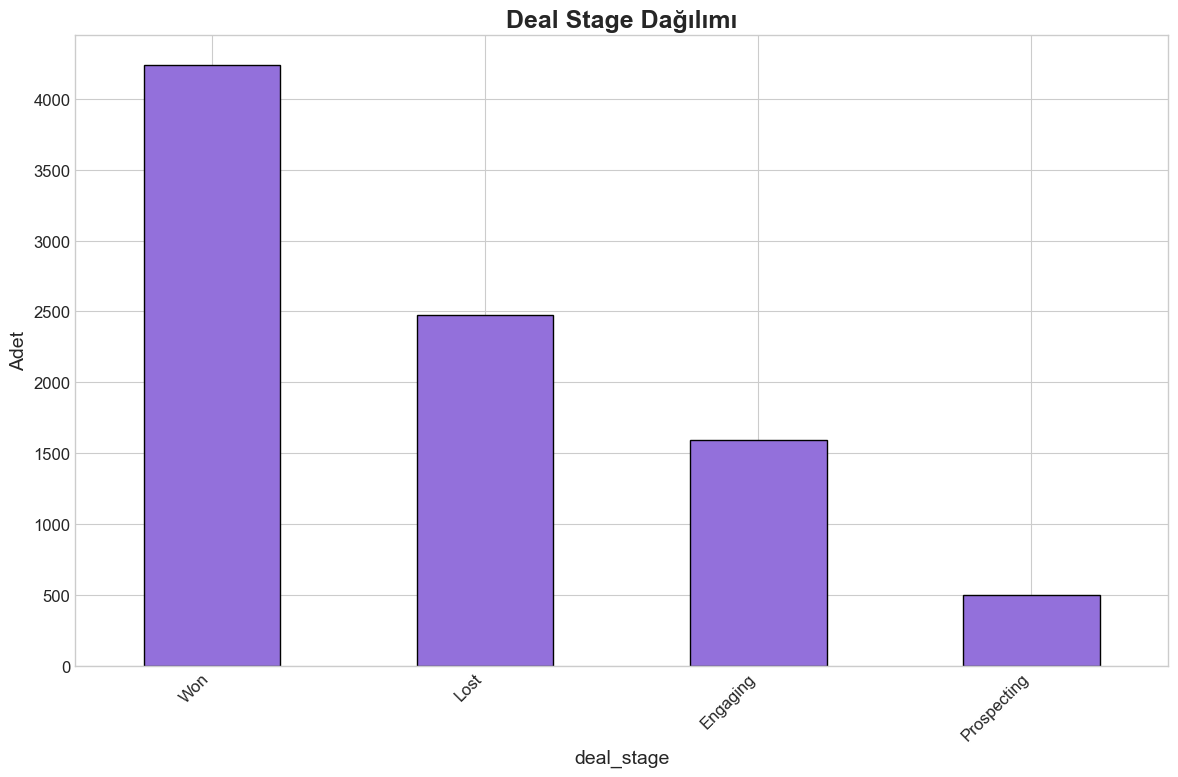

In [61]:
if 'deal_stage' in sales_pipeline_df.columns:
    plt.figure(figsize=(12, 8))
    sales_pipeline_df['deal_stage'].value_counts().plot(kind='bar', color='mediumpurple', edgecolor='black')
    plt.title('Deal Stage Dağılımı', fontsize=18, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Adet', fontsize=14)
    plt.tight_layout()
    plt.savefig('grafik_04_deal_stage_dagilimi.png', dpi=400)
    plt.show()

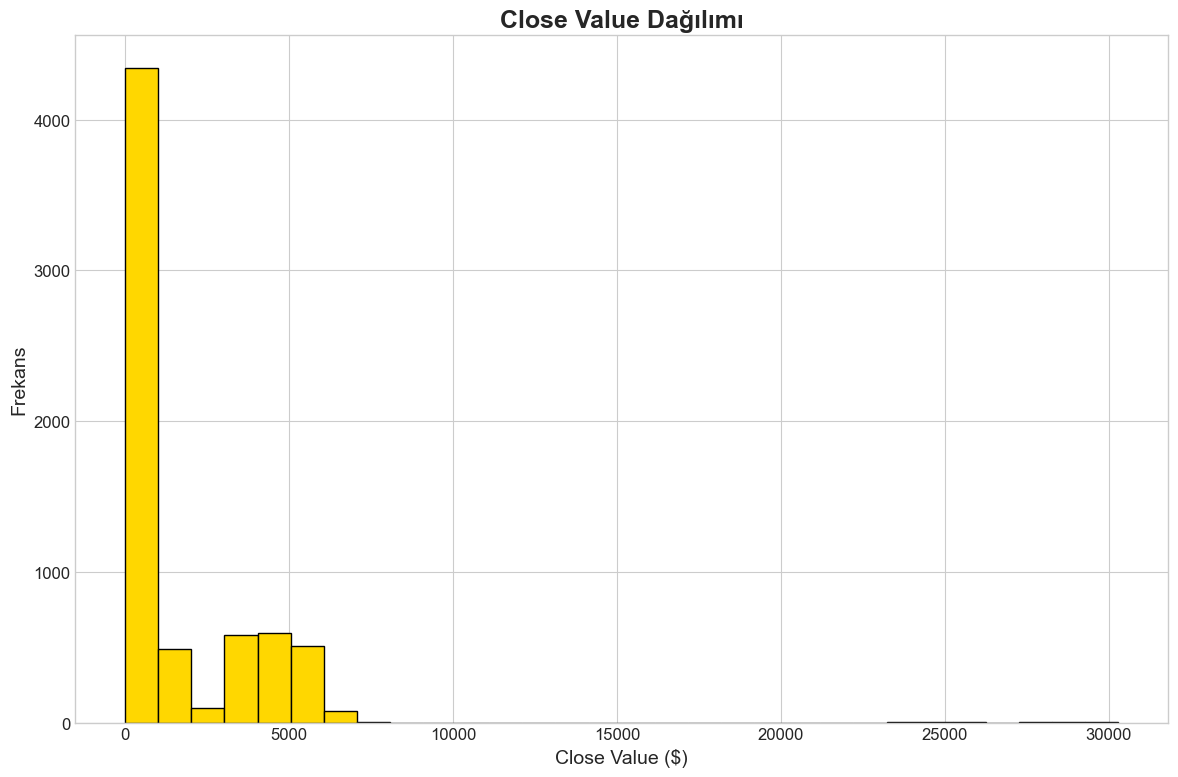

In [62]:
if 'close_value' in sales_pipeline_df.columns:
    plt.figure(figsize=(12, 8))
    sales_pipeline_df['close_value'].hist(bins=30, edgecolor='black', color='gold')
    plt.title('Close Value Dağılımı', fontsize=18, fontweight='bold')
    plt.xlabel('Close Value ($)', fontsize=14)
    plt.ylabel('Frekans', fontsize=14)
    plt.tight_layout()
    plt.savefig('grafik_05_close_value_dagilimi.png', dpi=400)
    plt.show()

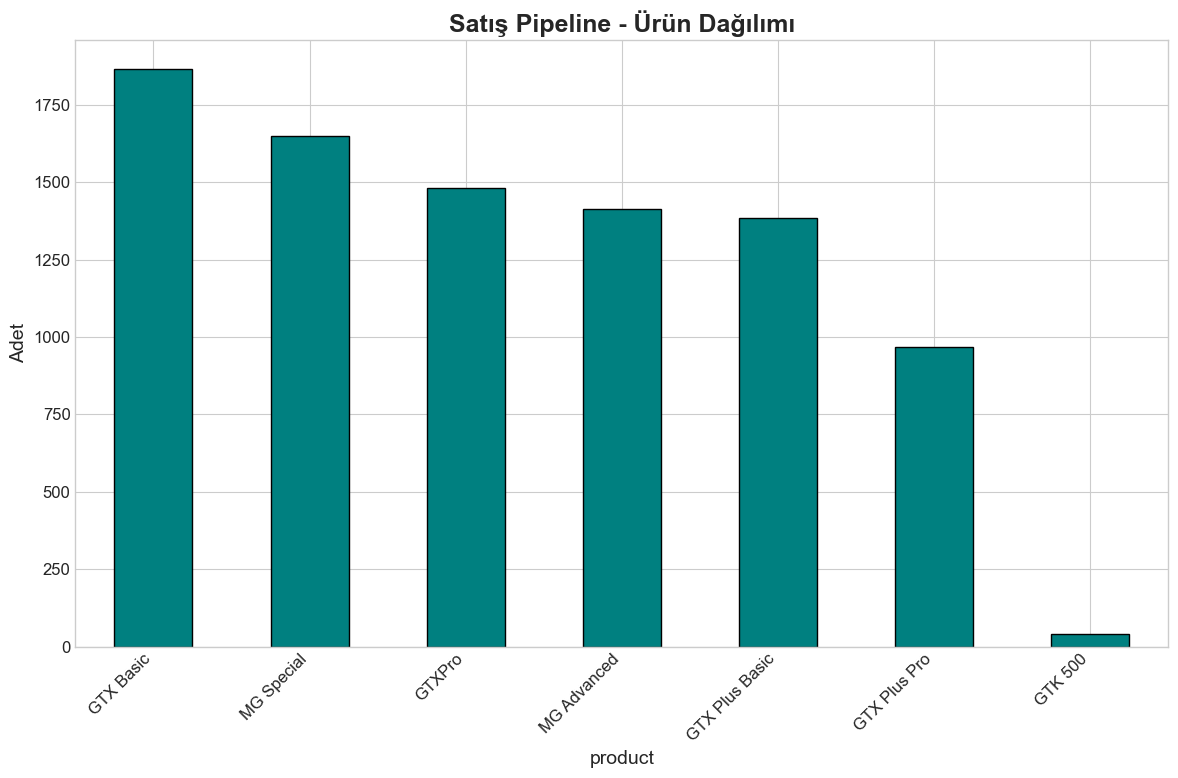

In [63]:
if 'product' in sales_pipeline_df.columns:
    plt.figure(figsize=(12, 8))
    sales_pipeline_df['product'].value_counts().plot(kind='bar', color='teal', edgecolor='black')
    plt.title('Satış Pipeline - Ürün Dağılımı', fontsize=18, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Adet', fontsize=14)
    plt.tight_layout()
    plt.savefig('grafik_06_pipeline_urun_dagilimi.png', dpi=400)
    plt.show()

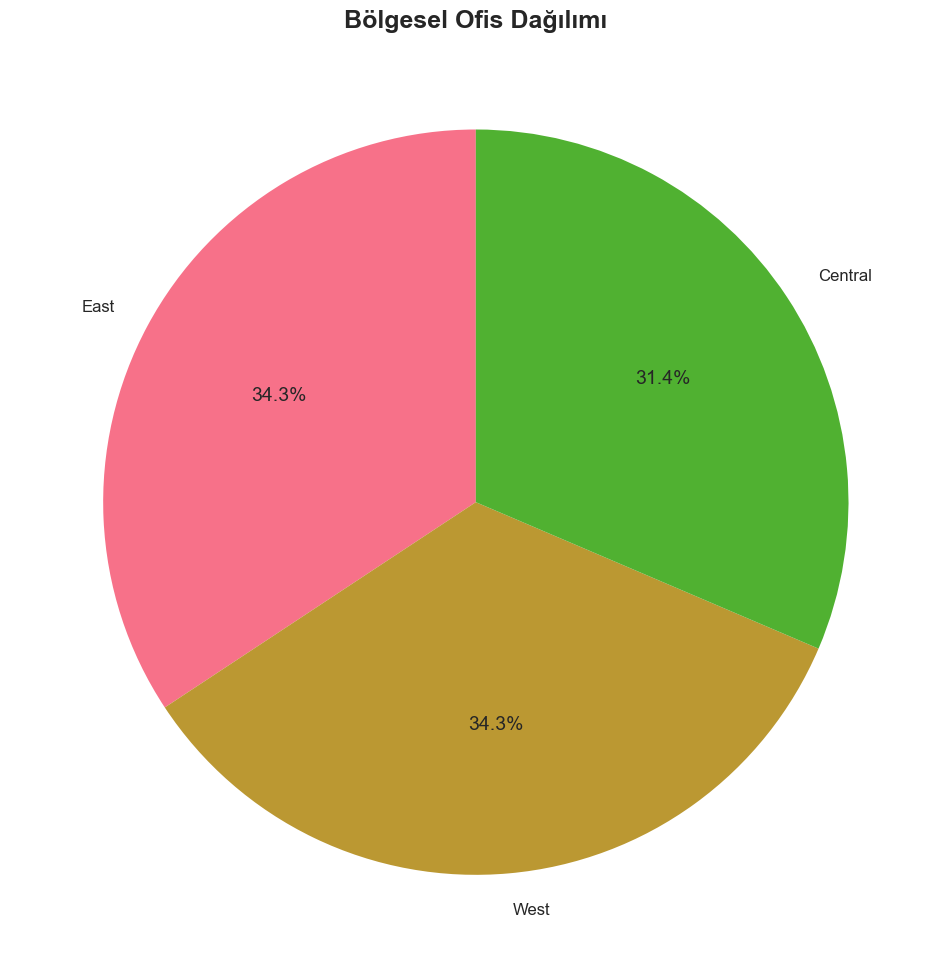

In [64]:
if 'regional_office' in sales_team_df.columns:
    plt.figure(figsize=(10, 10))
    sales_team_df['regional_office'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Bölgesel Ofis Dağılımı', fontsize=18, fontweight='bold')
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('grafik_07_regional_office_dagilimi.png', dpi=400)
    plt.show()

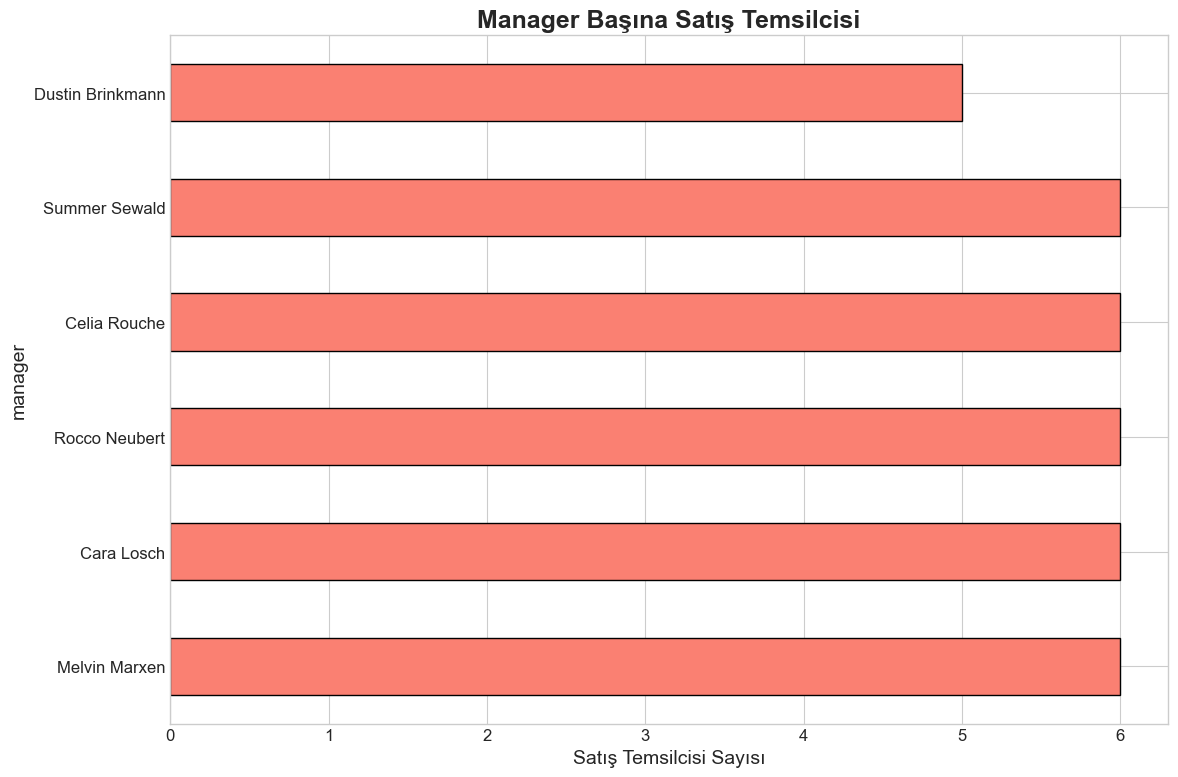

In [66]:
if 'manager' in sales_team_df.columns:
    plt.figure(figsize=(12, 8))
    sales_team_df['manager'].value_counts().plot(kind='barh', color='salmon', edgecolor='black')
    plt.title('Manager Başına Satış Temsilcisi', fontsize=18, fontweight='bold')
    plt.xlabel('Satış Temsilcisi Sayısı', fontsize=14)
    plt.tight_layout()
    plt.savefig('grafik_08_manager_salesagent_dagilimi.png', dpi=400)
    plt.show()

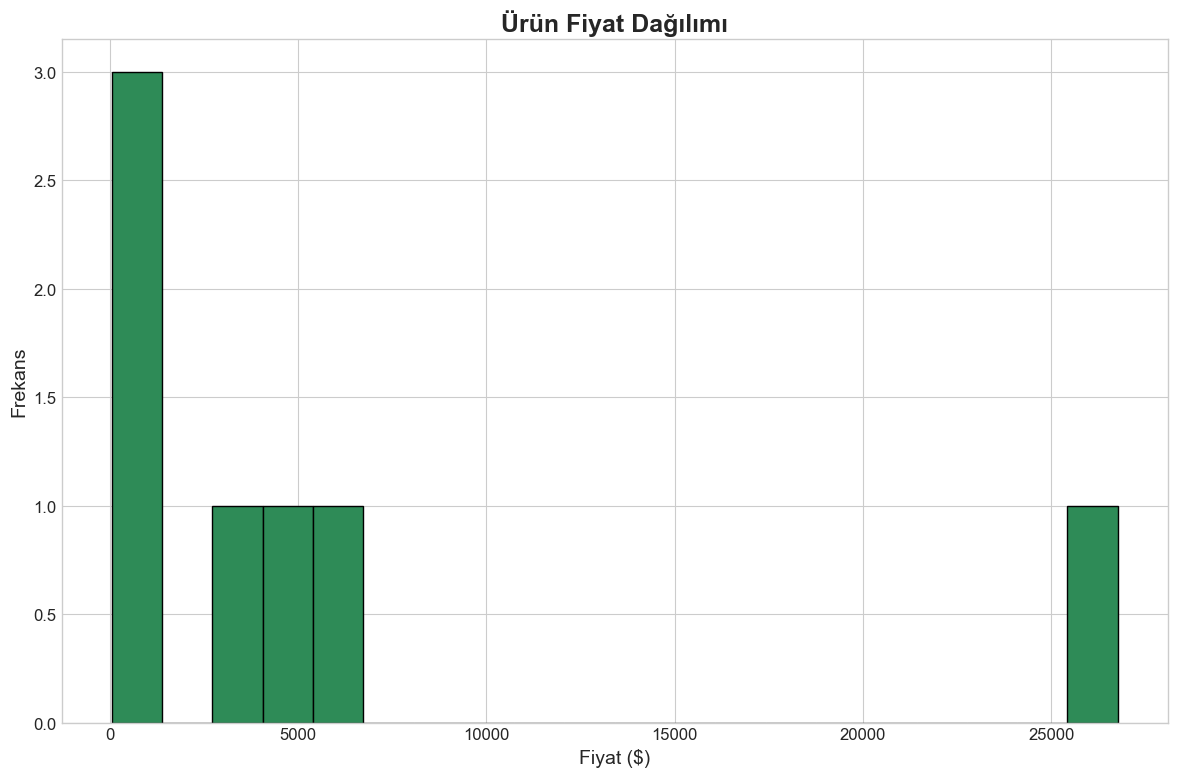

In [67]:
if 'sales_price' in products_df.columns:
    plt.figure(figsize=(12, 8))
    products_df['sales_price'].hist(bins=20, edgecolor='black', color='seagreen')
    plt.title('Ürün Fiyat Dağılımı', fontsize=18, fontweight='bold')
    plt.xlabel('Fiyat ($)', fontsize=14)
    plt.ylabel('Frekans', fontsize=14)
    plt.tight_layout()
    plt.savefig('grafik_09_urun_fiyat_dagilimi.png', dpi=400)
    plt.show()

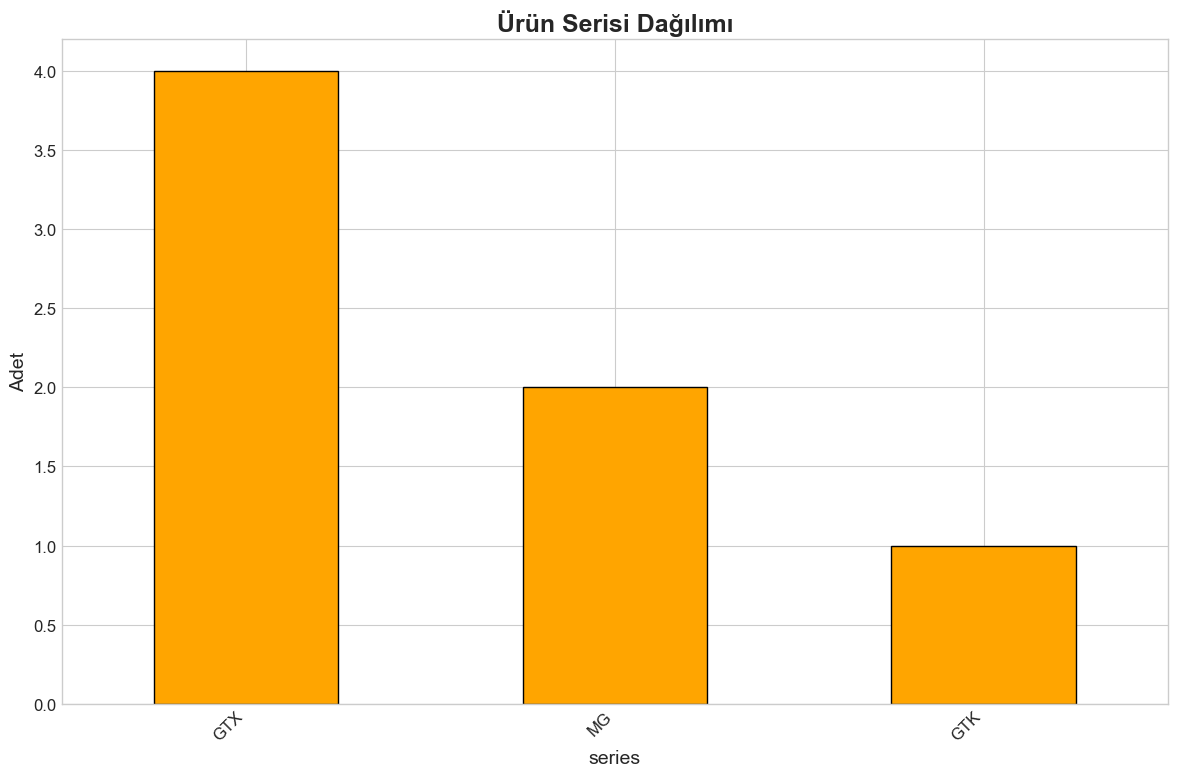

In [68]:
if 'series' in products_df.columns:
    plt.figure(figsize=(12, 8))
    products_df['series'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
    plt.title('Ürün Serisi Dağılımı', fontsize=18, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Adet', fontsize=14)
    plt.tight_layout()
    plt.savefig('grafik_10_urun_serisi_dagilimi.png', dpi=400)
    plt.show()

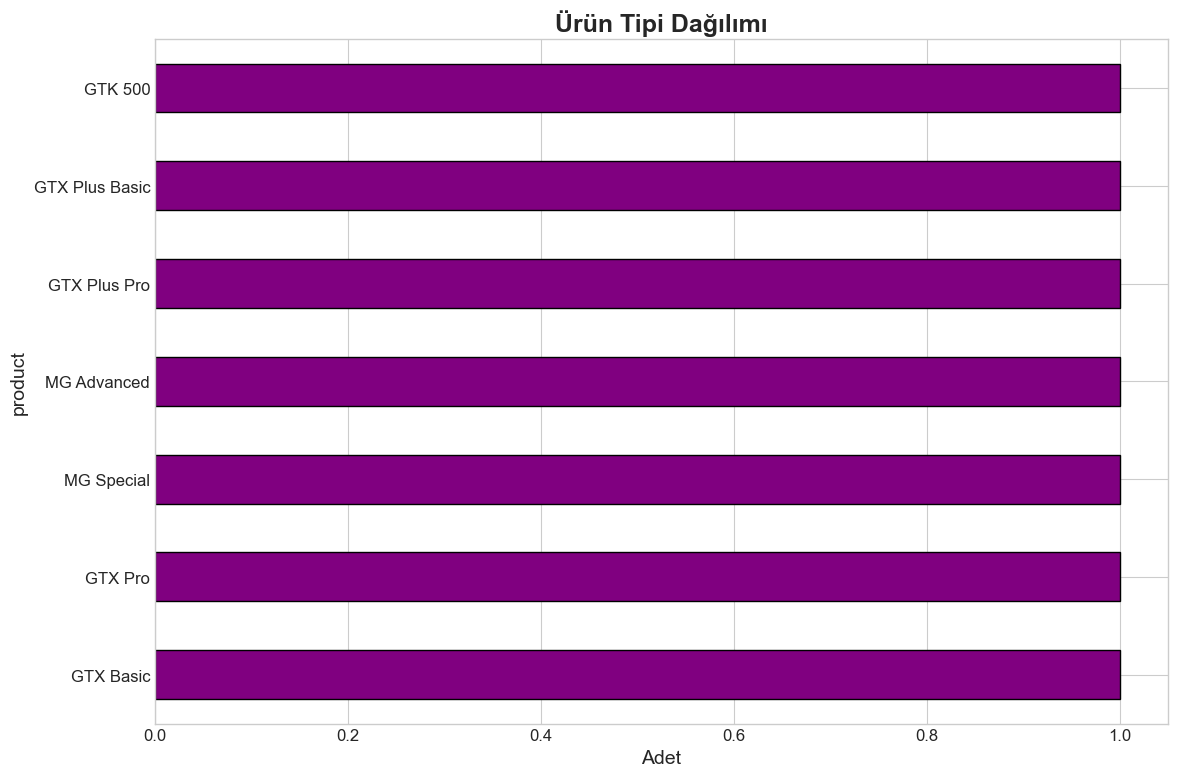

In [69]:
if 'product' in products_df.columns:
    plt.figure(figsize=(12, 8))
    products_df['product'].value_counts().plot(kind='barh', color='purple', edgecolor='black')
    plt.title('Ürün Tipi Dağılımı', fontsize=18, fontweight='bold')
    plt.xlabel('Adet', fontsize=14)
    plt.tight_layout()
    plt.savefig('grafik_11_urun_tipi_dagilimi.png', dpi=400)
    plt.show()

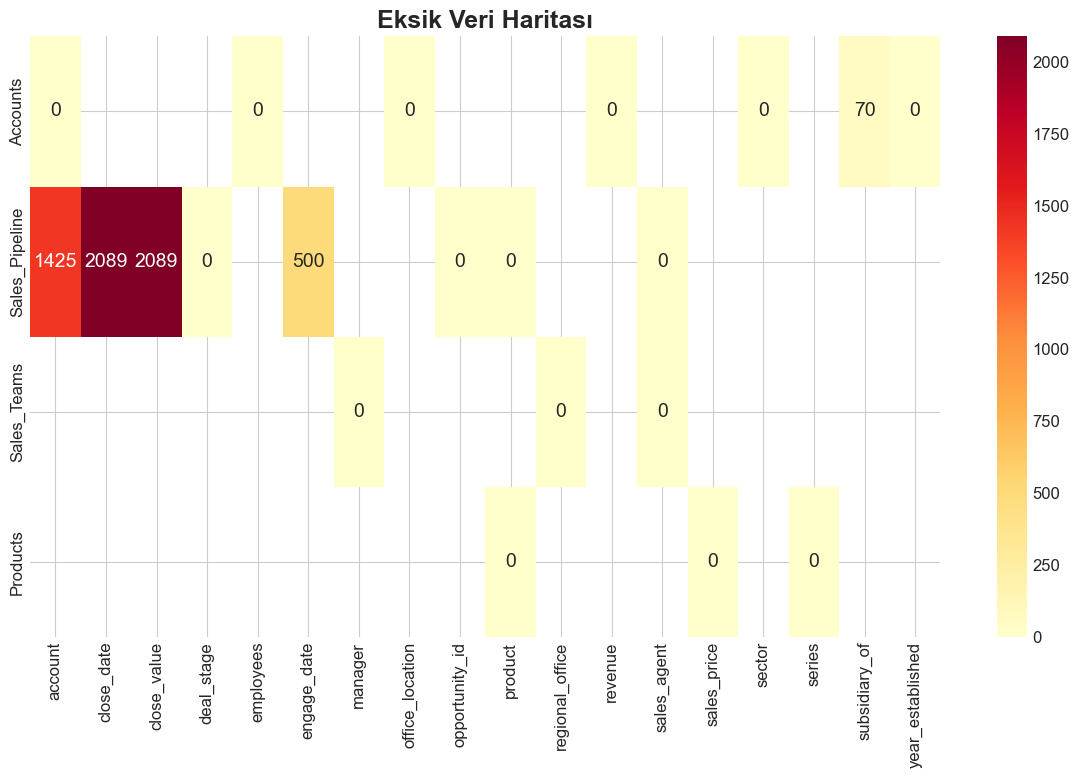

In [70]:
plt.figure(figsize=(12, 8))
combined_missing = pd.DataFrame({
    'Accounts': accounts_df.isnull().sum(),
    'Sales_Pipeline': sales_pipeline_df.isnull().sum(),
    'Sales_Teams': sales_team_df.isnull().sum(),
    'Products': products_df.isnull().sum()
})
sns.heatmap(combined_missing.T, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Eksik Veri Haritası', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('grafik_12_eksik_veri_haritasi.png', dpi=400)
plt.show()

# =============================================================================
# 6. KORELASYON ANALİZİ
# =============================================================================


✓ Korelasyon matrisi 'correlation_matrix.png' olarak kaydedildi.


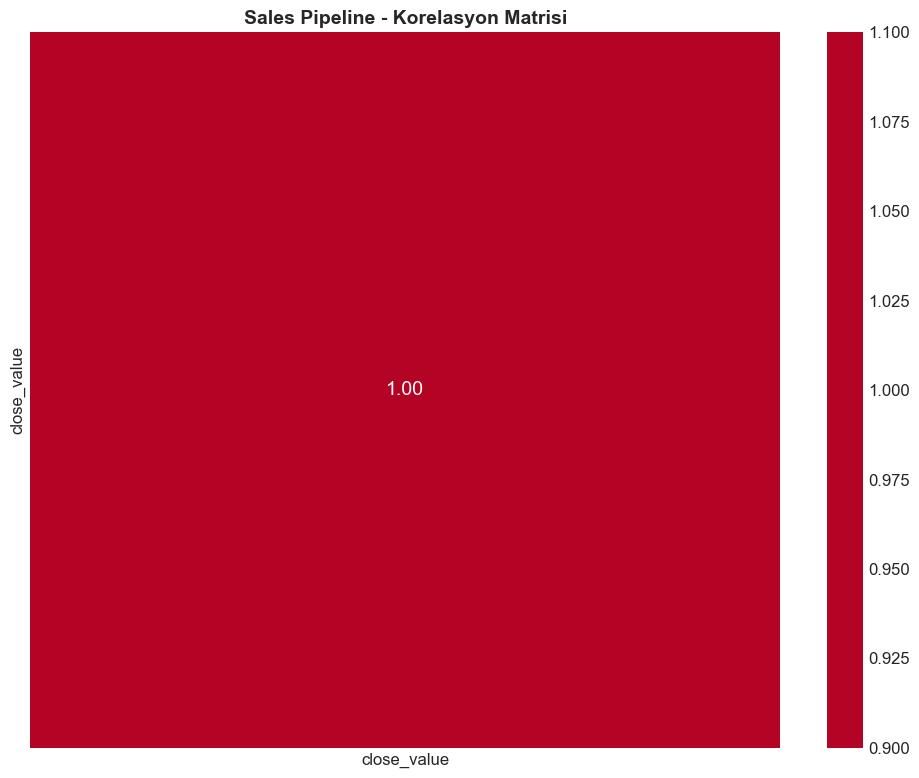

In [71]:
# Sales Pipeline numerik değişkenler korelasyonu
numeric_sales = sales_pipeline_df.select_dtypes(include=[np.number])
if not numeric_sales.empty:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_sales.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Sales Pipeline - Korelasyon Matrisi', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    print("\n✓ Korelasyon matrisi 'correlation_matrix.png' olarak kaydedildi.")

# =============================================================================
# 7. OUTLIER (AYKIRI DEĞER) ANALİZİ
# =============================================================================

In [72]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Revenue için outlier tespiti
if 'revenue' in accounts_df.columns:
    outlier_count, lower, upper = detect_outliers_iqr(accounts_df, 'revenue')
    print(f"\n--- Revenue Aykırı Değerler ---")
    print(f"Aykırı değer sayısı: {outlier_count}")
    print(f"Alt sınır: ${lower:,.2f}")
    print(f"Üst sınır: ${upper:,.2f}")

# Close Value için outlier tespiti
if 'close_value' in sales_pipeline_df.columns:
    outlier_count, lower, upper = detect_outliers_iqr(sales_pipeline_df, 'close_value');
    print(f"\n--- Close Value Aykırı Değerler ---")
    print(f"Aykırı değer sayısı: {outlier_count}")
    print(f"Alt sınır: ${lower:,.2f}")
    print(f"Üst sınır: ${upper:,.2f}")


--- Revenue Aykırı Değerler ---
Aykırı değer sayısı: 6
Alt sınır: $-2,869.28
Üst sınır: $6,107.76

--- Close Value Aykırı Değerler ---
Aykırı değer sayısı: 15
Alt sınır: $-4,837.50
Üst sınır: $8,062.50


# =============================================================================
# 8. VERİ KALİTESİ RAPORU
# =============================================================================

In [74]:

def data_quality_report(df, table_name):
    print(f"\n--- {table_name} ---")
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()
    duplicate_rows = df.duplicated().sum()
    
    print(f"Toplam hücre sayısı: {total_cells:,}")
    print(f"Eksik hücre sayısı: {missing_cells:,} (%{(missing_cells/total_cells*100):.2f})")
    print(f"Tekrarlayan satır sayısı: {duplicate_rows:,}")
    print(f"Veri bütünlüğü skoru: %{((total_cells-missing_cells)/total_cells*100):.2f}")

data_quality_report(accounts_df, "ACCOUNTS")
data_quality_report(sales_pipeline_df, "SALES_PIPELINE")
data_quality_report(sales_team_df, "SALES_TEAMS")
data_quality_report(products_df, "PRODUCTS")





--- ACCOUNTS ---
Toplam hücre sayısı: 595
Eksik hücre sayısı: 70 (%11.76)
Tekrarlayan satır sayısı: 0
Veri bütünlüğü skoru: %88.24

--- SALES_PIPELINE ---
Toplam hücre sayısı: 70,400
Eksik hücre sayısı: 6,103 (%8.67)
Tekrarlayan satır sayısı: 0
Veri bütünlüğü skoru: %91.33

--- SALES_TEAMS ---
Toplam hücre sayısı: 105
Eksik hücre sayısı: 0 (%0.00)
Tekrarlayan satır sayısı: 0
Veri bütünlüğü skoru: %100.00

--- PRODUCTS ---
Toplam hücre sayısı: 21
Eksik hücre sayısı: 0 (%0.00)
Tekrarlayan satır sayısı: 0
Veri bütünlüğü skoru: %100.00


TEMEL BULGULAR:
---------------
✓ 4 veri seti başarıyla yüklendi ve incelendi
✓ Eksik veri analizi tamamlandı
✓ Aykırı değer tespiti yapıldı
✓ Korelasyon analizi gerçekleştirildi
✓ Veri kalitesi değerlendirildi
✓ 12 adet görselleştirme oluşturuldu

İLİŞKİLER:
----------
- ACCOUNTS ↔ SALES_PIPELINE: account_text üzerinden
- SALES_TEAMS ↔ SALES_PIPELINE: sales_agent_text üzerinden
- PRODUCTS ↔ SALES_PIPELINE: product_text üzerinden

SONRAKİ ADIMLAR (Data Preparation):
------------------------------------
1. Eksik verileri ele alma stratejisi belirle
2. Aykırı değerleri temizle veya dönüştür
3. Kategorik değişkenleri encode et
4. Feature engineering uygula
5. Veri setlerini birleştir (JOIN işlemleri)